In [393]:
import pandas as pd
import numpy as np
import random
from pandas_profiling import ProfileReport
from datetime import date
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv("android.csv")
df.head(10)

,battery_level,battery_plugged,battery_status,day,month,packages_running_android,packages_running_ch.smalltech.battery.free,packages_running_com.android.bluetooth,packages_running_com.android.calculator2,packages_running_com.android.chrome,...,packages_running_com.googlecode.pythonforandroid,packages_running_com.halfbrick.fruitninjafree,packages_running_com.rovio.angrybirdsspace.ads,packages_running_com.tf.thinkdroid.sg,packages_running_de.kicktipp.mbookmark,packages_running_edu.udo.cs.ess.mobidac.target,packages_running_org.openintents.filemanager,packages_running_stream.android,slot,year
0,25.0,1.0,2.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2012.0
1,3.0,0.0,0.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2012.0
2,1.0,1.0,4.5,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,2012.0
3,0.0,1.0,5.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,2012.0
4,0.0,0.5,4.0,31.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16.0,2012.0
5,0.0,0.0,0.0,31.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17.0,2012.0
6,-2.0,0.0,0.0,31.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.0,2012.0
7,-3.0,0.0,3.0,31.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,2012.0
8,-3.0,0.0,0.0,31.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.0,2012.0
9,-3.0,0.0,0.0,31.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22.0,2012.0


In [104]:
df = df[df['year'] > 2010] 

In [105]:
df = df.drop(df[(df.battery_plugged	 != 1) & (df.battery_plugged	 != 0)].index)

In [106]:
df = df.loc[:, (df != df.iloc[0]).any()]

In [107]:
df['year'] = df.year.astype(int).astype(str)
df['month'] = df.month.astype(int).astype(str)
df['day'] = df.day.astype(int).astype(str)
df["time"] = df["year"] + "-" + df["month"] + "-" + df["day"]

In [108]:
df.time = pd.to_datetime(df['time'], format='%Y-%m-%d')

In [109]:
df.head()

,battery_level,battery_plugged,battery_status,day,month,packages_running_ch.smalltech.battery.free,packages_running_com.android.bluetooth,packages_running_com.android.calculator2,packages_running_com.android.chrome,packages_running_com.android.contacts,...,packages_running_com.googlecode.pythonforandroid,packages_running_com.halfbrick.fruitninjafree,packages_running_com.rovio.angrybirdsspace.ads,packages_running_com.tf.thinkdroid.sg,packages_running_de.kicktipp.mbookmark,packages_running_edu.udo.cs.ess.mobidac.target,packages_running_org.openintents.filemanager,slot,year,time
0,25.0,1.0,2.0,31,8,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2012,2012-08-31
1,3.0,0.0,0.0,31,8,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2012,2012-08-31
2,1.0,1.0,4.5,31,8,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,2012,2012-08-31
3,0.0,1.0,5.0,31,8,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,2012,2012-08-31
5,0.0,0.0,0.0,31,8,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,2012,2012-08-31


In [110]:
profile = ProfileReport(df, minimal=True)
profile.to_file("output.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 672.27it/s]


In [111]:
# Calculated Unique States
#dfUnique = df.drop_duplicates()


In [125]:
batterie = df[['battery_level','battery_plugged', 'time']] #.drop_duplicates()

In [126]:
batterie

,battery_level,battery_plugged,time
0,25.0,1.0,2012-08-31
1,3.0,0.0,2012-08-31
2,1.0,1.0,2012-08-31
3,0.0,1.0,2012-08-31
5,0.0,0.0,2012-08-31
...,...,...,...
2464,0.0,0.0,2013-03-07
2465,-1.0,0.0,2013-03-07
2466,-1.0,0.0,2013-03-07
2467,0.0,0.0,2013-03-07


<AxesSubplot:xlabel='time'>

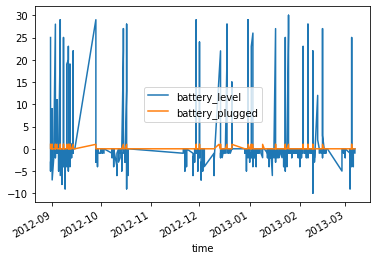

In [122]:

batterie.set_index(['time'],inplace=True)
batterie.plot()

<AxesSubplot:>

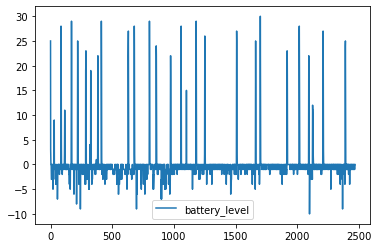

In [81]:
batterie.plot(y='battery_level')

In [415]:
class MarkovChain(object):
    def __init__(self, matrix):
        """
        Initialize the MarkovChain instance.
 
        Parameters
        ----------
        transition_prob: dict
            A dict object representing the transition 
            probabilities in Markov Chain. 
            Should be of the form: 
                {'state1': {'state1': 0.1, 'state2': 0.4}, 
                 'state2': {...}}
        """
        self.matrix = matrix
 
    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.
 
        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        nextState = np.matmul(self.matrix, current_state)
        candidates = []
        weight = []
        for i in range(len(nextState)):
            if(nextState[i] != 0):
                candidates.append(i)
                weight.append(nextState[i])
                
        if(len(candidates) == 0 or len(weight) == 0):
            print("Last States Error")
            return current_state

        s = random.choices(candidates, weights=weight, k=1)
        res = np.full((640,1), 0.0)
        res[s] = 1
        return res

 
    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.
 
        Parameters
        ----------
        current_state: str
            The state of the current random variable.
 
        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

In [ ]:
d0 = date(2008, 8, 18)
d1 = date(2008, 9, 26)
delta = d1 - d0
print(delta.days)

In [159]:
t = batterie['time'].to_numpy()
pre = t[0]
c = 0
cArray = []
for i in t:
   diff = i - pre
   pre = i
   cArray.append(c)
   if(diff.astype('timedelta64[m]') > np.timedelta64(2,'m')):
       #print(diff.astype('timedelta64[m]'))  
       #print(c)
       c = c + 1
#batterie['time']

In [161]:
df['group'] = cArray

In [162]:
df

,battery_level,battery_plugged,battery_status,day,month,packages_running_ch.smalltech.battery.free,packages_running_com.android.bluetooth,packages_running_com.android.calculator2,packages_running_com.android.chrome,packages_running_com.android.contacts,...,packages_running_com.halfbrick.fruitninjafree,packages_running_com.rovio.angrybirdsspace.ads,packages_running_com.tf.thinkdroid.sg,packages_running_de.kicktipp.mbookmark,packages_running_edu.udo.cs.ess.mobidac.target,packages_running_org.openintents.filemanager,slot,year,time,group
0,25.0,1.0,2.0,31,8,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2012,2012-08-31,0
1,3.0,0.0,0.0,31,8,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2012,2012-08-31,0
2,1.0,1.0,4.5,31,8,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,8.0,2012,2012-08-31,0
3,0.0,1.0,5.0,31,8,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,12.0,2012,2012-08-31,0
5,0.0,0.0,0.0,31,8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,17.0,2012,2012-08-31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,0.0,0.0,0.0,7,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,31.0,2013,2013-03-07,109
2465,-1.0,0.0,3.0,7,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,32.0,2013,2013-03-07,109
2466,-1.0,0.0,3.0,7,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,36.0,2013,2013-03-07,109
2467,0.0,0.0,0.0,7,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,38.0,2013,2013-03-07,109


In [166]:
pkVGroup = df.drop(['battery_level','year','slot','time','day','month', 'battery_status'], axis=1)
pkV = df.drop(['battery_level','year','slot','time','day','month', 'battery_status', 'group'], axis=1)
pkV.head(10)

,battery_plugged,packages_running_ch.smalltech.battery.free,packages_running_com.android.bluetooth,packages_running_com.android.calculator2,packages_running_com.android.chrome,packages_running_com.android.contacts,packages_running_com.android.defcontainer,packages_running_com.android.keychain,packages_running_com.android.mms,packages_running_com.android.musicfx,...,packages_running_com.google.android.partnersetup,packages_running_com.google.android.setupwizard,packages_running_com.google.android.youtube,packages_running_com.googlecode.pythonforandroid,packages_running_com.halfbrick.fruitninjafree,packages_running_com.rovio.angrybirdsspace.ads,packages_running_com.tf.thinkdroid.sg,packages_running_de.kicktipp.mbookmark,packages_running_edu.udo.cs.ess.mobidac.target,packages_running_org.openintents.filemanager
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [167]:
len(pkV)

2444

In [168]:
len(pkV.drop_duplicates())

640

In [170]:
states = pkV.drop_duplicates().to_numpy()
states

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.]])

In [171]:
len(states)

640

In [180]:
dfArray = pkVGroup.to_numpy()

In [181]:
dfArray

array([[  1.,   0.,   0., ...,   1.,   0.,   0.],
       [  0.,   0.,   0., ...,   1.,   0.,   0.],
       [  1.,   0.,   0., ...,   1.,   0.,   0.],
       ...,
       [  0.,   1.,   0., ...,   1.,   0., 109.],
       [  0.,   1.,   0., ...,   1.,   0., 109.],
       [  0.,   1.,   0., ...,   1.,   0., 109.]])

In [268]:
StateMatrix = np.full((640, 640), 0)

In [232]:
StateMatrix.shape

(640, 640)

In [255]:
def findIndexInStates(_states, entry):
    for i in range(len(_states)):
        #print(_states[i])
        #print(entry)
        #print(np.all(_states[i]==entry))
        if(np.all(_states[i]==entry)):
            return i

In [185]:
len(dfArray[1])

48

In [269]:
gruppe = len(dfArray[1]) -1
for i in range(len(dfArray) -1):
    act = dfArray[i]
    nex = dfArray[i+1]
    actState = act[0:gruppe]
    nexState = nex[0:gruppe]
    if(act[gruppe] == nex[gruppe]):
        indexActState = findIndexInStates(states, actState)
        indexNexState = findIndexInStates(states, nexState)
        StateMatrix[indexActState,indexNexState] += 1
        #print(result)


In [376]:
StateMatrix[:,1] 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

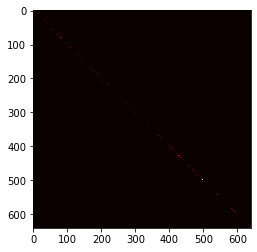

In [218]:
plt.imshow(StateMatrix, cmap='hot', interpolation='none')
plt.show()

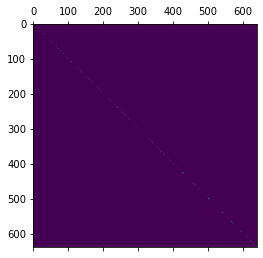

In [219]:
plt.matshow(StateMatrix)
plt.show()

In [274]:
save = np.full((640, 640), 0.0)

In [275]:
for i in range(len(StateMatrix)):
    s = StateMatrix[i].sum().astype('float')
    #print(s)
    if(s != 0):
        for j in range(len(StateMatrix[i])):
            if(StateMatrix[i][j] != 0):
                #print(StateMatrix[i][j])
                print(StateMatrix[i][j].astype('float') / s)
                save[i][j] = StateMatrix[i][j].astype('float') / s

1.0
1.0
0.5
0.5
1.0
0.9166666666666666
0.08333333333333333
0.5
0.5
1.0
1.0
0.6666666666666666
0.3333333333333333
1.0
1.0
1.0
1.0
1.0
1.0
0.5
0.5
1.0
0.8571428571428571
0.14285714285714285
1.0
0.5
0.5
1.0
1.0
1.0
1.0
0.5
0.5
0.75
0.25
1.0
0.5
0.5
0.75
0.25
0.8
0.2
0.875
0.125
0.6666666666666666
0.1111111111111111
0.1111111111111111
0.1111111111111111
0.5
0.5
0.75
0.25
1.0
0.5
0.5
1.0
0.5
0.5
1.0
0.8571428571428571
0.14285714285714285
1.0
0.6666666666666666
0.3333333333333333
0.5
0.5
0.5
0.5
1.0
1.0
0.6666666666666666
0.3333333333333333
0.5
0.5
1.0
0.5
0.5
1.0
0.125
0.75
0.125
0.8571428571428571
0.14285714285714285
0.5
0.5
0.8333333333333334
0.16666666666666666
0.5
0.5
0.9090909090909091
0.09090909090909091
1.0
0.8333333333333334
0.16666666666666666
0.5
0.5
0.5
0.5
0.3333333333333333
0.3333333333333333
0.3333333333333333
1.0
0.75
0.25
1.0
1.0
0.7777777777777778
0.1111111111111111
0.1111111111111111
0.8
0.2
1.0
1.0
0.8333333333333334
0.16666666666666666
0.9090909090909091
0.09090909090909

In [276]:
for i in range(len(save)):
    print(save[i].max())

1.0
1.0
0.5
1.0
0.9166666666666666
0.5
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
1.0
0.5
1.0
0.8571428571428571
1.0
0.5
1.0
1.0
1.0
1.0
0.5
0.75
1.0
0.5
0.75
0.8
0.875
0.6666666666666666
0.5
0.75
1.0
0.5
1.0
0.5
1.0
0.8571428571428571
1.0
0.6666666666666666
0.5
0.5
1.0
1.0
0.6666666666666666
0.0
0.5
1.0
0.5
1.0
0.75
0.8571428571428571
0.5
0.8333333333333334
0.5
0.9090909090909091
1.0
0.8333333333333334
0.5
0.5
0.3333333333333333
1.0
0.75
1.0
1.0
0.7777777777777778
0.8
1.0
1.0
0.8333333333333334
0.9090909090909091
0.8571428571428571
1.0
0.5
0.5
0.8
0.9166666666666666
1.0
0.9333333333333333
1.0
0.6666666666666666
0.8571428571428571
0.5
0.5
0.5
0.8888888888888888
1.0
0.6666666666666666
0.6666666666666666
1.0
1.0
0.5
0.5
0.75
0.7777777777777778
0.8888888888888888
0.5
0.6666666666666666
1.0
0.8
1.0
0.75
1.0
0.5
0.5
1.0
0.75
0.5
0.9090909090909091
0.6666666666666666
0.5
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.5
1.0
1.0
0.5
0.5
0.5
1.0
1.0
0.7142857142857143
0.5
1.0
0.8
0.0
0.75
0.66666666

In [291]:
#d = dict(enumerate(save, 1)) 
d = {index:{i:j for i,j in enumerate(k) if j} for index,k in enumerate(save)}

In [296]:
d.get(638)

{638: 0.9230769230769231, 639: 0.07692307692307693}

In [355]:
#vec(1,48)
def vecToState(featureVec):
    for i in range(len(states)):
        print(states[i])
        if((states[i]==featureVec).all()):
            res = np.full((640,1), 0.0)
            res[i] = 1
            return res

In [311]:
#vec(1,640)
def stateToVec(stateVec):
    for i in stateVec:
        if(i == 1):
            return states[i]

In [326]:
len(states)

640

In [335]:
len(dfArray[1][0:47])

47

In [356]:
v = vecToState(dfArray[1][0:47])

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]


In [364]:
vT = v.transpose()

In [365]:
vT.shape

(1, 640)

In [361]:
save.shape

(640, 640)

In [366]:
v.shape

(640, 1)

In [377]:
calc = np.matmul(save.transpose(), v)

In [368]:
calc.shape

(640, 1)

In [379]:
calc2 = np.matmul(save.transpose(), calc)

In [416]:
mc = MarkovChain(save.transpose())

In [421]:
calc = mc.generate_states(v,6)

In [420]:
calc[190]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],